# Analysing KeyPoint Information

We are planning to build a motion gesture recognition system.
As part of preprocessing we have already extraced out the keypoints using a combination of
1. Object Detection : For zooming in on identified person
2. Pose Estimation: To Extract the position of keypoints like Nose , Ear, Ankles, Wrists etc from the person identified in the previous step

Let's look at the data we have

In [1]:
!ls keypoint_dataset | head

Video100.mp4.json
Video101.mp4.json
Video_102.mp4.json
Video103.mp4.json
Video104.mp4.json
Video105.mp4.json
Video106.mp4.json
Video107.mp4.json
Video108.mp4.json
Video10.mp4.json


In [2]:
path_to_dataset = "./keypoint_dataset"

In [3]:
import pathlib
import os
import pandas as pd
import numpy as np
import json
import enum

In [4]:
js = json.load(open(os.path.join(path_to_dataset , "Video100.mp4.json") , "r"))

Each individual video's corresponding JSON file includes for each frame a set of `17` keypoints.

Each Keypoint includes

    - the bodypart indentifier
    - position coordinates
    - score : how confident the model is in the position

Let's extract all this information into a dataframe for easier analysis

In [5]:
js

{'fname': '/home/unccv/drone_project/keypoint_dataset/Video100.mp4.json',
 'data': [{'keyPoints': ['{"bodyPart": 0, "position": {"x": 125.0, "y": 175.0}, "score": 0.5269189557446853}',
    '{"bodyPart": 1, "position": {"x": 124.0, "y": 171.0}, "score": 0.5047564491982728}',
    '{"bodyPart": 2, "position": {"x": 125.0, "y": 170.0}, "score": 0.4298790619743004}',
    '{"bodyPart": 3, "position": {"x": 131.0, "y": 168.0}, "score": 0.30621048261961675}',
    '{"bodyPart": 4, "position": {"x": 121.0, "y": 170.0}, "score": 0.16645177133676484}',
    '{"bodyPart": 5, "position": {"x": 139.0, "y": 176.0}, "score": 0.5925294919749259}',
    '{"bodyPart": 6, "position": {"x": 110.0, "y": 176.0}, "score": 0.44018644543356195}',
    '{"bodyPart": 7, "position": {"x": 145.0, "y": 188.0}, "score": 0.5823669661633425}',
    '{"bodyPart": 8, "position": {"x": 106.0, "y": 189.0}, "score": 0.29489786333367646}',
    '{"bodyPart": 9, "position": {"x": 135.0, "y": 200.0}, "score": 0.4121345064722733}',
 

In [6]:
def js_to_rows(js):
    rows = []
    for d in js["data"]:
        data = []
        for k in d["keyPoints"]:
            r = json.loads(k)
            rv = [ r["position"]["x"] ,r["position"]["y"] ,r["score"] ]
            data.extend(rv)

        data = [js["fname"] , d["itr"] , d["score"]] + data
        rows.append(data)
    return rows

In [7]:
ncols = 3*17 + 3
len(js_to_rows(js)[0]) == ncols

True

In [8]:
all_rows = []
for f in os.listdir(path_to_dataset):
    js = json.load(open(os.path.join(path_to_dataset , f) , "r"))
    rows = js_to_rows(js)
    all_rows.extend(rows)

### Body Part Enum

We define a ENUM to go from BodyPart indentifier to Corresponding Label

In [9]:
class BodyPart(enum.IntEnum):
    __order__ = "NOSE LEFT_EYE RIGHT_EYE LEFT_EAR RIGHT_EAR LEFT_SHOULDER RIGHT_SHOULDER LEFT_ELBOW RIGHT_ELBOW LEFT_WRIST RIGHT_WRIST LEFT_HIP RIGHT_HIP LEFT_KNEE RIGHT_KNEE LEFT_ANKLE RIGHT_ANKLE"
    NOSE = 0
    LEFT_EYE = 1
    RIGHT_EYE= 2
    LEFT_EAR= 3
    RIGHT_EAR= 4
    LEFT_SHOULDER= 5
    RIGHT_SHOULDER = 6
    LEFT_ELBOW = 7
    RIGHT_ELBOW = 8
    LEFT_WRIST= 9
    RIGHT_WRIST= 10
    LEFT_HIP= 11
    RIGHT_HIP= 12
    LEFT_KNEE= 13
    RIGHT_KNEE = 14
    LEFT_ANKLE = 15
    RIGHT_ANKLE = 16

In [10]:
cols = ["fname" , "itr" , "score"]
for p in BodyPart:
    part = str(p).split(".")[1]
    cols.extend([f"{part}_{s}" for s in ["position_x" , "position_y" , "score"]])

In [11]:
len(cols)==ncols

True

In [12]:
df = pd.DataFrame(all_rows, columns=cols)

In [13]:
df.head()

,fname,itr,score,NOSE_position_x,NOSE_position_y,NOSE_score,LEFT_EYE_position_x,LEFT_EYE_position_y,LEFT_EYE_score,RIGHT_EYE_position_x,...,LEFT_KNEE_score,RIGHT_KNEE_position_x,RIGHT_KNEE_position_y,RIGHT_KNEE_score,LEFT_ANKLE_position_x,LEFT_ANKLE_position_y,LEFT_ANKLE_score,RIGHT_ANKLE_position_x,RIGHT_ANKLE_position_y,RIGHT_ANKLE_score
0,/home/unccv/drone_project/keypoint_dataset/Vid...,1,0.966363,129.0,74.0,0.996877,136.0,70.0,0.997522,124.0,...,0.986966,109.0,211.0,0.977960,155.0,251.0,0.917812,104.0,247.0,0.801409
1,/home/unccv/drone_project/keypoint_dataset/Vid...,2,0.976305,158.0,112.0,0.998212,163.0,106.0,0.996564,152.0,...,0.981531,137.0,264.0,0.979901,184.0,304.0,0.933117,130.0,304.0,0.881273
2,/home/unccv/drone_project/keypoint_dataset/Vid...,3,0.968037,153.0,110.0,0.998033,158.0,105.0,0.997617,147.0,...,0.960729,133.0,263.0,0.976513,179.0,306.0,0.931674,123.0,307.0,0.825488
3,/home/unccv/drone_project/keypoint_dataset/Vid...,4,0.964305,153.0,110.0,0.998103,158.0,103.0,0.997644,146.0,...,0.966592,133.0,263.0,0.975407,180.0,309.0,0.914553,125.0,304.0,0.873319
4,/home/unccv/drone_project/keypoint_dataset/Vid...,5,0.962395,153.0,110.0,0.998016,159.0,104.0,0.997534,146.0,...,0.951920,133.0,262.0,0.977448,180.0,308.0,0.936474,124.0,307.0,0.891542


In [14]:
df.shape

(17505, 54)

## Looking at the dataframe

Our final dataframe has 17,505 frames and 54 columns of information.
Let's take a look at the number of frames we have per video

In [15]:
df.groupby("fname").size().describe()

count    177.000000
mean      98.898305
std       25.025688
min       42.000000
25%       79.000000
50%       99.000000
75%      115.000000
max      187.000000
dtype: float64

We see that on an average we have 98 frames per video with minimum going to 42 and a max of 187.
This variation if because of two reasons
  - primariliy : Different lengths of the videos. Some are about 2-3 seconds some are longer around 7-8 seconds
  - another reason is the failure of object detection / pose estimation models
       - in some cases these models fail to detect the person/ identify the pose and therefore for that frame we get no information
       
### Normalizing Data

- Now the output of the pose estimation model is based on certain input assumptions and therefore the x,y values range from 0-257 ,0-353 respectively
- Therefore just for easier comprehension and putting the values on similar scales we divide by the `max` values
- Then all positions will range from `0-1`

In [16]:
pose_model_height , pose_model_width =  353, 257

In [17]:
def normalize_positions(col):
    if col.name.find("_x") > -1:
        return col / pose_model_width
    if col.name.find("_y") > -1:
        return col / pose_model_height
    return col

df = df.apply(normalize_positions)

In [18]:
df.head()

,fname,itr,score,NOSE_position_x,NOSE_position_y,NOSE_score,LEFT_EYE_position_x,LEFT_EYE_position_y,LEFT_EYE_score,RIGHT_EYE_position_x,...,LEFT_KNEE_score,RIGHT_KNEE_position_x,RIGHT_KNEE_position_y,RIGHT_KNEE_score,LEFT_ANKLE_position_x,LEFT_ANKLE_position_y,LEFT_ANKLE_score,RIGHT_ANKLE_position_x,RIGHT_ANKLE_position_y,RIGHT_ANKLE_score
0,/home/unccv/drone_project/keypoint_dataset/Vid...,1,0.966363,0.501946,0.209632,0.996877,0.529183,0.198300,0.997522,0.482490,...,0.986966,0.424125,0.597734,0.977960,0.603113,0.711048,0.917812,0.404669,0.699717,0.801409
1,/home/unccv/drone_project/keypoint_dataset/Vid...,2,0.976305,0.614786,0.317280,0.998212,0.634241,0.300283,0.996564,0.591440,...,0.981531,0.533074,0.747875,0.979901,0.715953,0.861190,0.933117,0.505837,0.861190,0.881273
2,/home/unccv/drone_project/keypoint_dataset/Vid...,3,0.968037,0.595331,0.311615,0.998033,0.614786,0.297450,0.997617,0.571984,...,0.960729,0.517510,0.745042,0.976513,0.696498,0.866856,0.931674,0.478599,0.869688,0.825488
3,/home/unccv/drone_project/keypoint_dataset/Vid...,4,0.964305,0.595331,0.311615,0.998103,0.614786,0.291785,0.997644,0.568093,...,0.966592,0.517510,0.745042,0.975407,0.700389,0.875354,0.914553,0.486381,0.861190,0.873319
4,/home/unccv/drone_project/keypoint_dataset/Vid...,5,0.962395,0.595331,0.311615,0.998016,0.618677,0.294618,0.997534,0.568093,...,0.951920,0.517510,0.742210,0.977448,0.700389,0.872521,0.936474,0.482490,0.869688,0.891542


In [20]:
import re

In [21]:
df["category"] = (df["fname"].apply(lambda v : int(re.findall("(\d+)" , v)[0]) % 4 )).astype("category")

In [22]:
from plotnine import *

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8239otjt because the default path (/home/unccv/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [23]:
df["category"].value_counts()

2    4735
3    4442
0    4409
1    3919
Name: category, dtype: int64

/home/unccv/.local/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 112'. Pick better value with 'binwidth'.


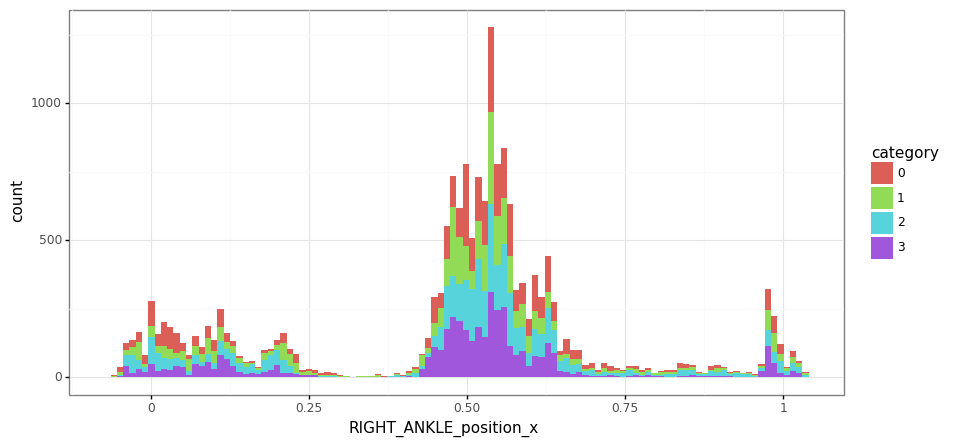

<ggplot: (34210251710)>

In [24]:
(
    ggplot(df , aes(x="RIGHT_ANKLE_position_x" , fill="category"))
    + geom_histogram()
    + theme_bw()
    + theme(figure_size=(10,5))
)

In [25]:
df.columns

Index(['fname', 'itr', 'score', 'NOSE_position_x', 'NOSE_position_y',
       'NOSE_score', 'LEFT_EYE_position_x', 'LEFT_EYE_position_y',
       'LEFT_EYE_score', 'RIGHT_EYE_position_x', 'RIGHT_EYE_position_y',
       'RIGHT_EYE_score', 'LEFT_EAR_position_x', 'LEFT_EAR_position_y',
       'LEFT_EAR_score', 'RIGHT_EAR_position_x', 'RIGHT_EAR_position_y',
       'RIGHT_EAR_score', 'LEFT_SHOULDER_position_x',
       'LEFT_SHOULDER_position_y', 'LEFT_SHOULDER_score',
       'RIGHT_SHOULDER_position_x', 'RIGHT_SHOULDER_position_y',
       'RIGHT_SHOULDER_score', 'LEFT_ELBOW_position_x',
       'LEFT_ELBOW_position_y', 'LEFT_ELBOW_score', 'RIGHT_ELBOW_position_x',
       'RIGHT_ELBOW_position_y', 'RIGHT_ELBOW_score', 'LEFT_WRIST_position_x',
       'LEFT_WRIST_position_y', 'LEFT_WRIST_score', 'RIGHT_WRIST_position_x',
       'RIGHT_WRIST_position_y', 'RIGHT_WRIST_score', 'LEFT_HIP_position_x',
       'LEFT_HIP_position_y', 'LEFT_HIP_score', 'RIGHT_HIP_position_x',
       'RIGHT_HIP_position_y

In [26]:
def angle_between(row , point_type_1 , point_type_2 , point_type_3):
    points = []
    for point_type in [point_type_1 , point_type_2 , point_type_3]:
        x = row[point_type + "_position_x"]
        y = row[point_type + "_position_y"]
        points.extend([x,y])
    
    return angle_between_points(*points)

def angle_between_points(x1,y1 ,x2,y2,x3,y3):
    v1_x = (x1-x2)
    v1_y = (y1-y2)
    v2_x = (x3-x2)
    v2_y = (y3-y2)
    #print(v1_x , v1_y , v2_x , v2_y)
    return np.arccos((v1_x*v2_x + v1_y*v2_y) / np.sqrt(v1_x**2 + v1_y**2)*np.sqrt(v2_x**2 + v2_y**2))

In [27]:
vector_pdf = pd.DataFrame()
for combinations in [["ELBOW" , "SHOULDER", "ELBOW" , "WRIST"] 
                     , ["LEG" , "HIP", "KNEE" , "ANKLE"]
                     , [ "ARM" , "HIP", "SHOULDER" , "ELBOW"]]:
    for side in ["LEFT" , "RIGHT"]:
        t = combinations[0]
        cols = [side+"_"+c for c in combinations[1:]]
        print(cols)
        vector_pdf[f"{side}_{t}"] = df.apply(lambda row : angle_between(row , *cols) ,axis=1)

['LEFT_SHOULDER', 'LEFT_ELBOW', 'LEFT_WRIST']


/home/unccv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
/home/unccv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arccos


['RIGHT_SHOULDER', 'RIGHT_ELBOW', 'RIGHT_WRIST']
['LEFT_HIP', 'LEFT_KNEE', 'LEFT_ANKLE']
['RIGHT_HIP', 'RIGHT_KNEE', 'RIGHT_ANKLE']
['LEFT_HIP', 'LEFT_SHOULDER', 'LEFT_ELBOW']
['RIGHT_HIP', 'RIGHT_SHOULDER', 'RIGHT_ELBOW']


In [28]:
vector_df = vector_pdf.join(df[["category" , "itr"]])

In [29]:
vector_df.iloc[: , 0:6] = 180 * vector_df.iloc[: , 0:6] / np.pi 

In [30]:
vector_df.head()

,LEFT_ELBOW,RIGHT_ELBOW,LEFT_LEG,RIGHT_LEG,LEFT_ARM,RIGHT_ARM,category,itr
0,90.420193,90.303059,90.835256,90.616683,89.669765,89.513732,1,1
1,90.422632,90.454137,90.883114,90.773965,89.520828,89.394054,1,2
2,90.426866,90.361586,90.956077,90.966248,89.396333,89.332169,1,3
3,90.228128,90.723215,91.120585,90.821429,89.320449,89.367707,1,4
4,90.355875,90.631476,91.232625,90.988173,89.316330,89.409576,1,5


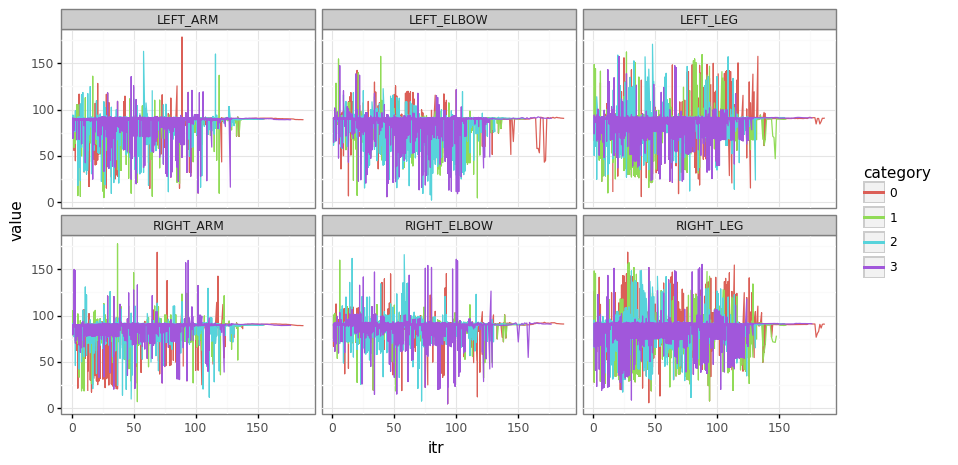

<ggplot: (34210257044)>

In [31]:
(
    ggplot(vector_df.melt(id_vars=["category" , "itr"]), aes(x="itr" ,y="value" , color="category" , group="category"))
    + geom_line()
    + facet_wrap("~ variable")
    + theme_bw()
    + theme(figure_size=(10,5))
)

In [32]:
vector_df.iloc[: , 0:6].rolling(10).min()

,LEFT_ELBOW,RIGHT_ELBOW,LEFT_LEG,RIGHT_LEG,LEFT_ARM,RIGHT_ARM
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
17500,89.210864,89.838250,90.831064,90.914638,89.047027,89.112856
17501,89.210864,89.879576,90.831064,90.914638,89.047027,89.112856
17502,89.210864,89.879576,90.831064,90.611079,89.047027,89.112856
17503,89.210864,89.999223,90.951320,90.611079,88.950099,88.719414


In [34]:
mean_df = vector_df.iloc[: , 0:6].rolling(10).mean()
min_df = vector_df.iloc[: , 0:6].rolling(10).min()
max_df = vector_df.iloc[: , 0:6].rolling(10).max()
sd_df = vector_df.iloc[: , 0:6].rolling(10).std()
desc_df = pd.DataFrame(np.hstack([mean_df , min_df , max_df , sd_df]), columns=[f"{t}_{c}" for t in ["mean" , "min" , "max" , "std"] for c in vector_df.columns[0:6]] )
desc_df = desc_df.join(vector_df[["category" , "itr"]])
desc_df.iloc[10:16 , :]

,mean_LEFT_ELBOW,mean_RIGHT_ELBOW,mean_LEFT_LEG,mean_RIGHT_LEG,mean_LEFT_ARM,mean_RIGHT_ARM,min_LEFT_ELBOW,min_RIGHT_ELBOW,min_LEFT_LEG,min_RIGHT_LEG,...,max_LEFT_ARM,max_RIGHT_ARM,std_LEFT_ELBOW,std_RIGHT_ELBOW,std_LEFT_LEG,std_RIGHT_LEG,std_LEFT_ARM,std_RIGHT_ARM,category,itr
10,90.247981,90.333035,91.041583,90.873023,89.586567,89.435818,90.104894,90.069121,90.883114,90.773965,...,89.832981,89.624916,0.120463,0.211645,0.103715,0.070656,0.200023,0.091535,1,11
11,90.205738,90.289541,91.056526,90.892251,89.608363,89.466442,90.000199,90.019199,90.933852,90.800409,...,89.832981,89.700289,0.126338,0.228048,0.087907,0.066760,0.203901,0.122125,1,12
12,90.160516,90.252341,91.069041,90.897171,89.643798,89.495147,89.974644,89.989588,90.933852,90.800409,...,89.832981,89.700289,0.119121,0.244721,0.080624,0.074216,0.193483,0.120786,1,13
13,90.122384,90.154618,91.061400,90.915796,89.679284,89.510434,89.846813,89.745984,90.933852,90.800409,...,89.832981,89.700289,0.151659,0.230501,0.078796,0.076433,0.156620,0.112236,1,14
14,90.057015,90.083168,91.038631,90.923464,89.716262,89.532014,89.702182,89.745984,90.933852,90.800409,...,89.832981,89.700289,0.178365,0.168722,0.052245,0.087539,0.091533,0.111432,1,15
15,89.995099,90.033214,91.041112,90.931775,89.731872,89.545432,89.641305,89.745984,90.933852,90.800409,...,89.832981,89.700289,0.205322,0.187966,0.051762,0.092291,0.066314,0.112923,1,16


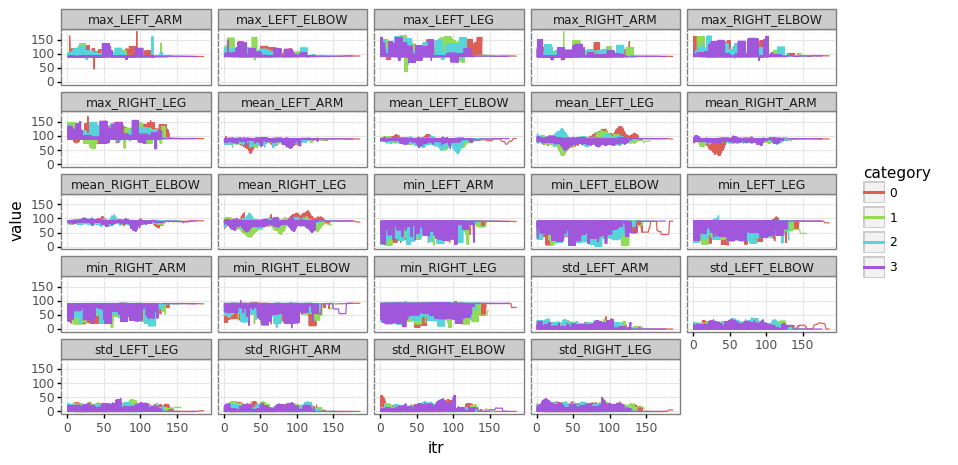

<ggplot: (34207507646)>

In [35]:
(
    ggplot(desc_df.melt(id_vars=["category" , "itr"]), aes(x="itr" ,y="value" , color="category" , group="category"))
    + geom_line()
    + facet_wrap("~ variable")
    + theme_bw()
    + theme(figure_size=(10,5))
)

In [36]:
desc_df.groupby("category").size()

category
0    4409
1    3919
2    4735
3    4442
dtype: int64

In [37]:
vector_df

,LEFT_ELBOW,RIGHT_ELBOW,LEFT_LEG,RIGHT_LEG,LEFT_ARM,RIGHT_ARM,category,itr
0,90.420193,90.303059,90.835256,90.616683,89.669765,89.513732,1,1
1,90.422632,90.454137,90.883114,90.773965,89.520828,89.394054,1,2
2,90.426866,90.361586,90.956077,90.966248,89.396333,89.332169,1,3
3,90.228128,90.723215,91.120585,90.821429,89.320449,89.367707,1,4
4,90.355875,90.631476,91.232625,90.988173,89.316330,89.409576,1,5
...,...,...,...,...,...,...,...,...
17500,90.988210,90.536138,90.951439,91.203639,89.827126,89.641931,0,93
17501,90.789717,90.618787,90.951320,91.149692,89.800745,89.676109,0,94
17502,89.951803,90.886243,91.094877,90.611079,89.839363,89.465423,0,95
17503,91.026846,90.584877,91.350062,91.439426,88.950099,88.719414,0,96
